In [0]:
import cv2
from keras.utils import np_utils
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
path_folder = '/Volumes/Dados/Computer Vision Datasets/Cats and Dogs/CATS_DOGS'
cat4 = cv2.imread(path_folder+'/train/CAT/4.jpg')

In [0]:
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

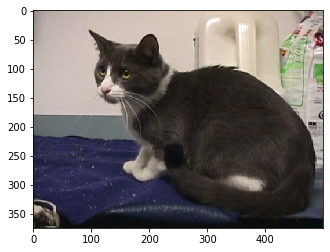

In [0]:
plt.imshow(cat4)

In [0]:
cat4.shape

(375, 500, 3)

In [0]:
dog2 = cv2.imread(path_folder+'/train/DOG/2.jpg')

In [0]:
dog2 = cv2.cvtColor(dog2,cv2.COLOR_BGR2RGB)

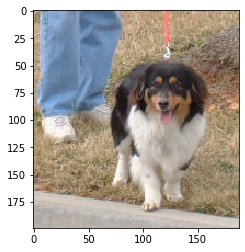

In [0]:
plt.imshow(dog2)
plt.savefig('1xxxxxxx.png')

In [0]:
dog2.shape 

(199, 188, 3)

## Preparing the Data for the model

There is too much data for us to read all at once in memory. We can use some built in functions in Keras to automatically process the data, generate a flow of batches from a directory, and also manipulate the images.

### Image Manipulation

Its usually a good idea to manipulate the images with rotation, resizing, and scaling so the model becomes more robust to different images that our data set doesn't have. We can use the **ImageDataGenerator** to do this automatically for us. Check out the documentation for a full list of all the parameters you can use here!

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
image_gen = ImageDataGenerator(rotation_range=30,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              rescale=1/225,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              fill_mode='nearest')

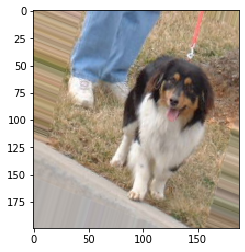

In [0]:
plt.imshow(image_gen.random_transform(dog2))

In [0]:
image_gen.flow_from_directory(path_folder+'/train')

Found 18743 images belonging to 2 classes.


In [0]:
input_shape = (150, 150, 3)

# Building our model

Observe que importaremos a seguir a função MaxPooling2D que pertence ao pacote keras propriamente dito 
e não a função utilizada anteriormente MaxPool2D que pertence ao pacote tf.keras.layers que pertenceo ao Tensorflow.

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, Activation

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 18496)            

In [0]:
batch_size = 16

In [0]:
train_image_gen = image_gen.flow_from_directory(path_folder+'/train', 
                                                target_size=input_shape[:2],
                                               batch_size = batch_size, 
                                                class_mode='binary')

Found 18743 images belonging to 2 classes.


In [0]:
test_image_gen = image_gen.flow_from_directory(path_folder+'/test', 
                                                target_size=input_shape[:2],
                                               batch_size = batch_size, 
                                                class_mode='binary')

Found 6251 images belonging to 2 classes.


In [0]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

# Training ou model

In [0]:
import warnings
warnings.filterwarnings('ignore')

In [0]:
results = model.fit_generator(train_image_gen, epochs=100, steps_per_epoch=150,
                   validation_data=test_image_gen, validation_steps=15)

Epoch 1/100
150/150 [==============================] - 113s 752ms/step - loss: 0.6961 - accuracy: 0.5238 - val_loss: 0.8477 - val_accuracy: 0.5250
Epoch 2/100
150/150 [==============================] - 108s 722ms/step - loss: 0.6868 - accuracy: 0.5554 - val_loss: 0.6807 - val_accuracy: 0.5875
Epoch 3/100
150/150 [==============================] - 113s 753ms/step - loss: 0.6913 - accuracy: 0.5446 - val_loss: 0.7145 - val_accuracy: 0.4958
Epoch 4/100
150/150 [==============================] - 109s 725ms/step - loss: 0.6775 - accuracy: 0.5858 - val_loss: 0.5879 - val_accuracy: 0.5875
Epoch 5/100
150/150 [==============================] - 110s 734ms/step - loss: 0.6812 - accuracy: 0.5742 - val_loss: 0.6713 - val_accuracy: 0.6208
Epoch 6/100
150/150 [==============================] - 115s 764ms/step - loss: 0.6631 - accuracy: 0.5883 - val_loss: 0.7827 - val_accuracy: 0.5917
Epoch 7/100
150/150 [==============================] - 108s 719ms/step - loss: 0.6759 - accuracy: 0.5822 - val_loss: 0

In [0]:
results.history['val_accuracy']

[0.5249999761581421,
 0.5874999761581421,
 0.4958333373069763,
 0.5874999761581421,
 0.6208333373069763,
 0.5916666388511658,
 0.6041666865348816,
 0.5791666507720947,
 0.550000011920929,
 0.625,
 0.6666666865348816,
 0.5791666507720947,
 0.6666666865348816,
 0.6625000238418579,
 0.6666666865348816,
 0.6333333253860474,
 0.6791666746139526,
 0.637499988079071,
 0.6333333253860474,
 0.6666666865348816,
 0.7749999761581421,
 0.699999988079071,
 0.7416666746139526,
 0.7124999761581421,
 0.675000011920929,
 0.675000011920929,
 0.714893639087677,
 0.7416666746139526,
 0.6958333253860474,
 0.737500011920929,
 0.7083333134651184,
 0.7749999761581421,
 0.7250000238418579,
 0.7791666388511658,
 0.7583333253860474,
 0.7749999761581421,
 0.7124999761581421,
 0.7666666507720947,
 0.7666666507720947,
 0.762499988079071,
 0.699999988079071,
 0.762499988079071,
 0.7583333253860474,
 0.7250000238418579,
 0.7124999761581421,
 0.6791666746139526,
 0.737500011920929,
 0.762499988079071,
 0.77916663885116

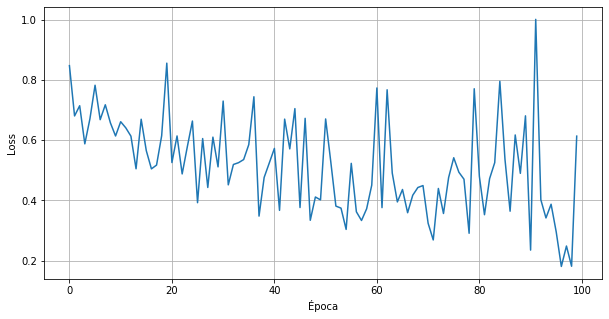

In [0]:
plt.figure(figsize=(10,5))
plt.plot(results.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Época')
plt.grid()
plt.savefig('loss.png')

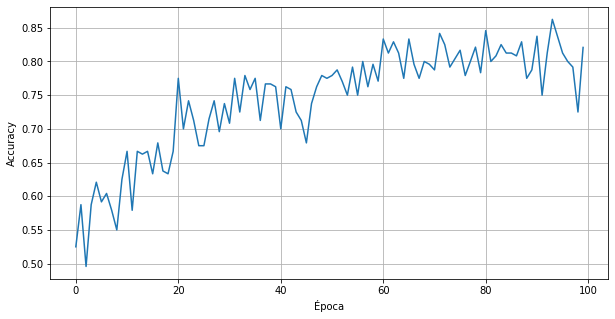

In [0]:
plt.figure(figsize=(10,5))
plt.plot(results.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Época')
plt.grid()
plt.savefig('accuracy.png')

# Predicting on new images

In [0]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [0]:
import numpy as np
from keras.preprocessing import image

dog_file = path_folder+'/train/DOG/6.jpg'

dog_img = image.load_img(dog_file, target_size=(150, 150))

dog_img = image.img_to_array(dog_img)

dog_img = np.expand_dims(dog_img, axis=0)
dog_img = dog_img/255

In [0]:
prediction_prob = model.predict(dog_img)

In [0]:
# Output prediction
print(f'Probability that image is a dog is: {prediction_prob} ')

Probability that image is a dog is: [[0.9950434]] 
